# Rainfall prediction competition

## 1. Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

## 2. Load data to dataframes

In [3]:
tr_df = pd.read_csv("/Volumes/LaCie/icloud drive/classwork/cosc4347/submission/data/train.csv")
te_df = pd.read_csv("/Volumes/LaCie/icloud drive/classwork/cosc4347/submission/data/test.csv")

## 3. Exploratory Data Analysis

## - print sample and shape

In [4]:
print(f" train head: {tr_df.sample(5)}")
print(f"train shape: {tr_df.shape}")
print(f"test head: {te_df.sample(5)}")
print(f"test shape: {te_df.shape}")

 train head:         id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
1716  1716  257    1008.7     30.1         28.0     27.9      26.3      91.0   
391    391   27    1019.8     24.7         22.2     20.6      20.8      89.0   
1270  1270  176    1000.7     30.4         28.6     25.4      25.5      84.0   
2187  2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   
2078  2078  254    1006.7     32.8         29.6     25.5      20.9      75.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
1716   89.0       2.1           80.0       25.0         1  
391    86.0       1.6          110.0       15.3         1  
1270   84.0       5.7          220.0       11.7         1  
2187   79.0       5.0           40.0       32.9         1  
2078   38.0      10.1          220.0       12.8         0  
train shape: (2190, 13)
test head:        id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
76   2266   77    1012.5     25.

## - get info on columns

In [5]:
print(f"train info {tr_df.info()}")
print(f"test info {te_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB
train info None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------    

In [6]:
print(f" train contains null values:{tr_df.isna().values.any()}")
print(f" test contains null values:{te_df.isna().values.any()}")

 train contains null values:False
 test contains null values:True


### no null values noted in the training data but one noted in the test data, we will deal with this by replacing it with an average of all values

In [7]:
te_df['winddirection'].fillna(te_df['winddirection'].mean(), inplace=True)

/var/folders/56/q0rk9k0n5bv0w5s0m0p_yzkr0000gn/T/ipykernel_67041/2870126578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  te_df['winddirection'].fillna(te_df['winddirection'].mean(), inplace=True)


## - get statistics

In [8]:
tr_df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


From the data we can see that overall there are more rainy days than not, let's visualize this

Text(0.5, 1.0, 'Distribution of rainfall')

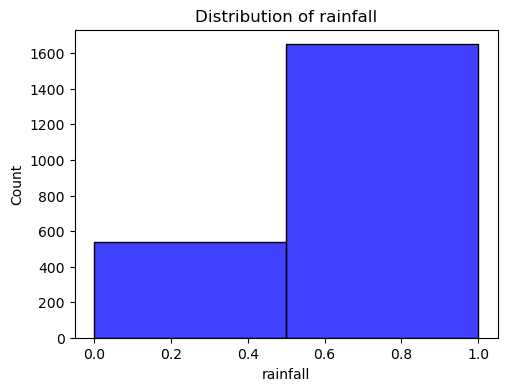

In [9]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.histplot(tr_df['rainfall'],bins=2,color='b',ax=ax)
ax.set_title('Distribution of rainfall')

### - correlation plot

<Axes: >

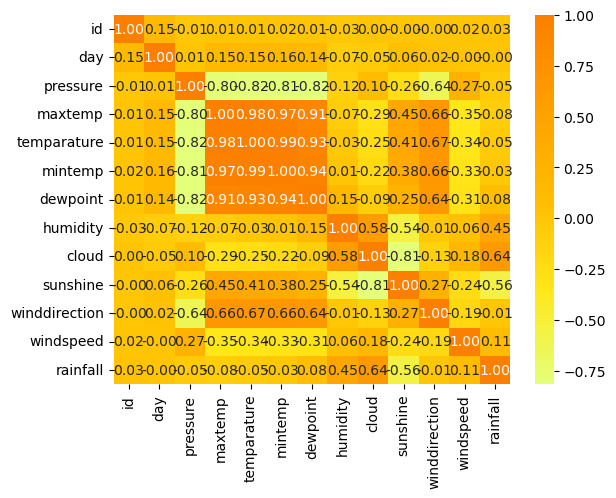

In [10]:
corr = tr_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True, fmt=".2f")

### Note that the five most correlated features to rainfall in order are cloud, sunshine, humidity, windspeed, and maxtemp. There also are correlations between these features that indicate some possible dependence between features.

# 4. Data splitting and Normalization

In [11]:

# First we split the training and testing sets into x and y

y_train = tr_df['rainfall']
x_train = tr_df.drop(columns='rainfall')

x_test = te_df

# Create scaler and fit to the training data
scaler = StandardScaler()
array = scaler.fit(x_train)

# Transform training and testing data using scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 5. Models

## - Logistic regression
### - This model is used to calculate the probability of an instance being a member of the 1 class.

In [12]:
# Logistic regression


# convert back into df
cols = tr_df.drop(columns='rainfall').columns
index = range(tr_df.shape[0])
x_train = pd.DataFrame(x_train, columns= cols, index=index)

# create parameter

parameter = ['theta_'+str(i) for i in range(x_train.shape[1]+1)]
columns = ['intersect:x_0=1'] + list(x_train.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

# create and train model
LR = LogisticRegression()
LR.fit(x_train, y_train)

# output training scores
y_train_pred = LR.predict(x_train)
log_reg_accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
print(f"Logistic regression training Accuracy: {log_reg_accuracy}")
print(f"Training Precision: {precision:.4f}")
print(f"Training Recall: {recall:.4f}")


# get parameter coefficients
sk_theta = [LR.intercept_[0]]+list(LR.coef_[0])
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
print(f" The logistic regression parameter coefficients are: {parameter_df}")

# test model and output results
y_pred = LR.predict_proba(x_test)[:, 1]
test_index = te_df['id'].values
results = pd.DataFrame({'id' : test_index, 'rainfall':y_pred})
print(f"Here are the values of rainfall predicted{results}")
results.to_csv('/Volumes/LaCie/icloud drive/classwork/cosc4347/submissionrainfall_logreg.csv', index=False)




Logistic regression training Accuracy: 0.867579908675799
Training Precision: 0.8899
Training Recall: 0.9406
 The logistic regression parameter coefficients are:    Parameter          Columns  Sklearn_theta
0    theta_0  intersect:x_0=1       1.650103
1    theta_1               id       0.111678
2    theta_2              day       0.039721
3    theta_3         pressure      -0.206508
4    theta_4          maxtemp       0.099464
5    theta_5      temparature      -0.175710
6    theta_6          mintemp      -0.325204
7    theta_7         dewpoint       0.753036
8    theta_8         humidity       0.328970
9    theta_9            cloud       1.140320
10  theta_10         sunshine      -0.552955
11  theta_11    winddirection      -0.018568
12  theta_12        windspeed       0.143279
Here are the values of rainfall predicted       id  rainfall
0    2190  0.984911
1    2191  0.986557
2    2192  0.938835
3    2193  0.133847
4    2194  0.057778
..    ...       ...
725  2915  0.979286
726  291

/opt/homebrew/Caskroom/miniforge/base/envs/sk-learn/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# 6. Feature selection

## - To improve the predictive scores of the model we will select features with the largest coefficients 

In [13]:

# Repeat LR

# convert back into df
cols = tr_df.drop(columns='rainfall').columns
col = te_df.columns
index = range(tr_df.shape[0])
ind = range(te_df.shape[0])
x_train_trunc= pd.DataFrame(x_train, columns= cols, index=index)
x_test = pd.DataFrame(x_test, columns= col, index=ind)
# drop features with theta below 0.1
x_train_trunc = x_train.drop(columns=["day", "maxtemp", "winddirection"])
x_test_trunc = x_test.drop(columns=["day", "maxtemp", "winddirection"])
# create parameter

parameter = ['theta_'+str(i) for i in range(x_train_trunc.shape[1]+1)]
columns = ['intersect:x_0=1'] + list(x_train_trunc.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns})

# create and train model
LR = LogisticRegression()
LR.fit(x_train_trunc, y_train)

# output training scores
y_train_pred_trunc = LR.predict(x_train_trunc)
log_reg_accuracy_trunc = accuracy_score(y_train, y_train_pred_trunc)
precision = precision_score(y_train, y_train_pred_trunc)
recall = recall_score(y_train, y_train_pred_trunc)
print(f"Logistic regression with feature selection training Accuracy: {log_reg_accuracy_trunc}")
print(f"Training Precision: {precision:.4f}")
print(f"Training Recall: {recall:.4f}")


# get parameter coefficients
sk_theta = [LR.intercept_[0]]+list(LR.coef_[0])
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
print(f" The logistic regression parameter coefficients are: {parameter_df}")

# test model and output results
y_pred_trunc = LR.predict_proba(x_test_trunc)[:, 1]
test_index = te_df['id'].values
results = pd.DataFrame({'id' : test_index, 'rainfall':y_pred_trunc})
print(f"Here are the values of rainfall predicted with feature selection{results}")
results.to_csv('/Volumes/LaCie/icloud drive/classwork/cosc4347/submissionrainfall_logreg_featureselexction.csv', index=False)


Logistic regression with feature selection training Accuracy: 0.865296803652968
Training Precision: 0.8883
Training Recall: 0.9394
 The logistic regression parameter coefficients are:   Parameter          Columns  Sklearn_theta
0   theta_0  intersect:x_0=1       1.653773
1   theta_1               id       0.117433
2   theta_2         pressure      -0.191886
3   theta_3      temparature      -0.099322
4   theta_4          mintemp      -0.306056
5   theta_5         dewpoint       0.756200
6   theta_6         humidity       0.327664
7   theta_7            cloud       1.135162
8   theta_8         sunshine      -0.551732
9   theta_9        windspeed       0.142484
Here are the values of rainfall predicted with feature selection       id  rainfall
0    2190  0.985928
1    2191  0.987624
2    2192  0.944227
3    2193  0.141493
4    2194  0.060962
..    ...       ...
725  2915  0.978551
726  2916  0.915239
727  2917  0.974877
728  2918  0.989142
729  2919  0.942423

[730 rows x 2 columns]
